# Image Thresholding

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
img = cv2.imread('../DATA/rainbow.jpg')

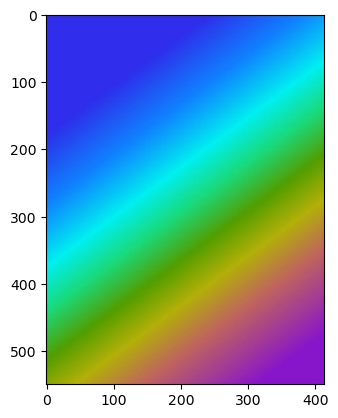

In [4]:
plt.imshow(img)

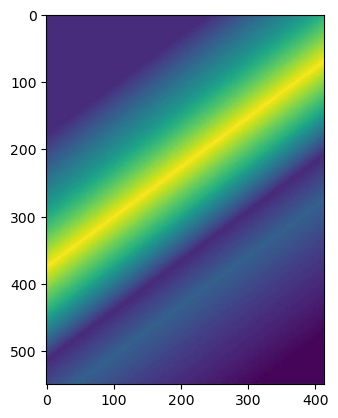

In [8]:
img = cv2.imread('../DATA/rainbow.jpg',0)
# plt.imshow(img)

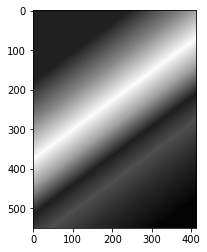

In [5]:
plt.imshow(img, cmap='gray')

# Different Threshold Types

## Binary

In [6]:
cv2.threshold(img, 127, 255,cv2.THRESH_BINARY)

(127.0,
 array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8))

In [8]:
ret, thresh1 = cv2.threshold(img, 127, 255,cv2.THRESH_BINARY)

In [9]:
ret

127.0

In [10]:
thresh1

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

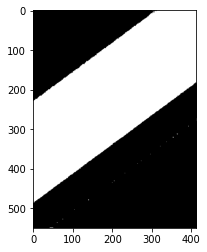

In [11]:
plt.imshow(thresh1,cmap='gray')

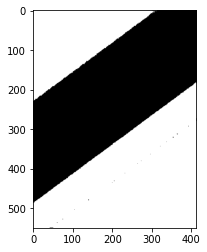

In [12]:
ret, thresh2 = cv2.threshold(img, 127, 255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')

# Threshold Trunction

* https://docs.opencv.org/3.4.12/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576ac7e89a5e95490116e7d2082b3096b2b8

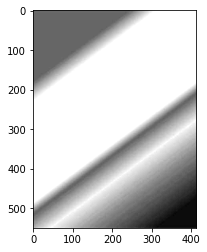

In [13]:
ret, thresh3 = cv2.threshold(img, 127, 255,cv2.THRESH_TRUNC)
plt.imshow(thresh3,cmap='gray')

In [14]:
thresh3

array([[107, 107, 107, ..., 127, 127, 127],
       [103, 103, 103, ..., 127, 127, 127],
       [103, 103, 103, ..., 127, 127, 127],
       ...,
       [115, 115, 115, ...,  88,  89,  91],
       [116, 116, 116, ...,  89,  91,  93],
       [118, 118, 118, ...,  93,  94,  96]], dtype=uint8)

# Threshold to Zero

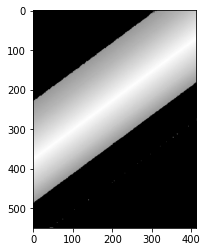

In [15]:
ret, thresh4 = cv2.threshold(img, 127, 255,cv2.THRESH_TOZERO)
plt.imshow(thresh4,cmap='gray')

# Threshold to Zero (Inverse)

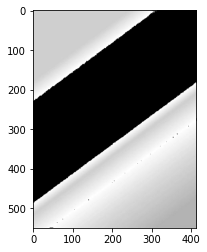

In [16]:
ret, thresh5 = cv2.threshold(img, 127, 255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh5,cmap='gray')

# Real World Applications

## Adaptive Thresholding

### Crossword Image

In [9]:
img = cv2.imread('../DATA/crossword.jpg', 0)

In [14]:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    

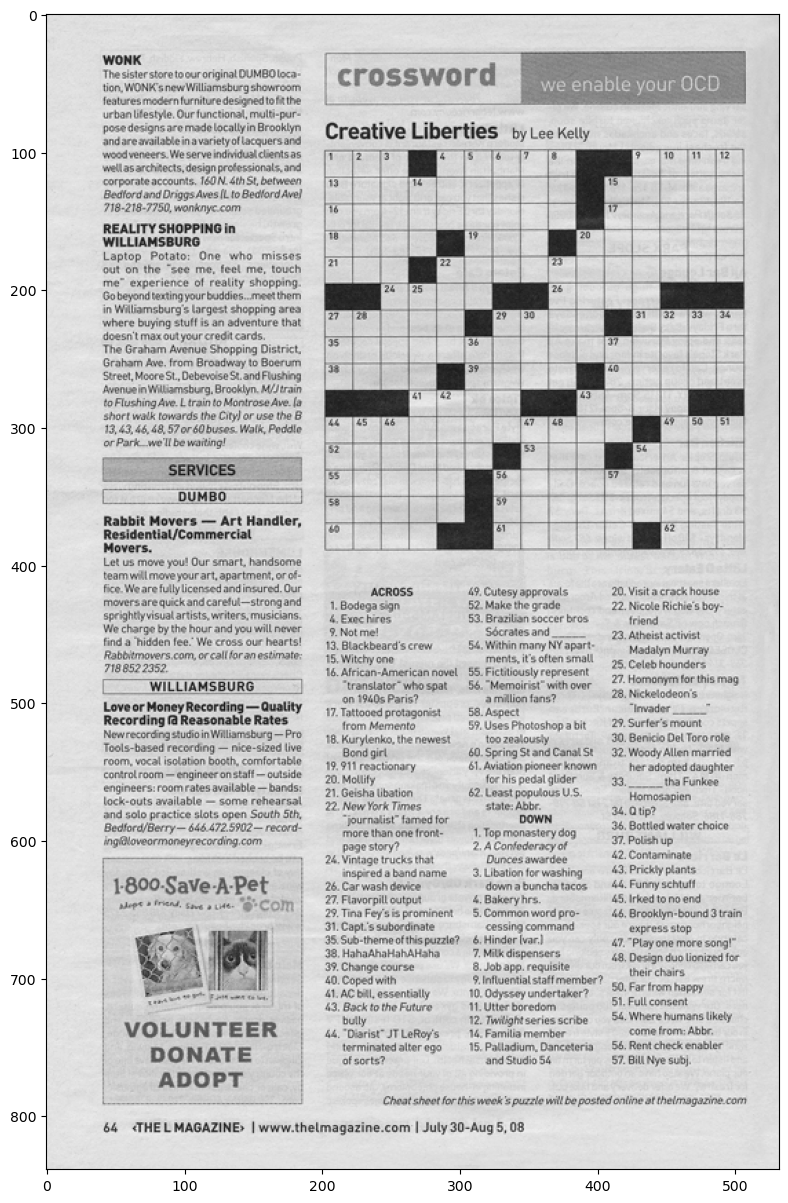

In [15]:
show_pic(img)

# Simple Binary

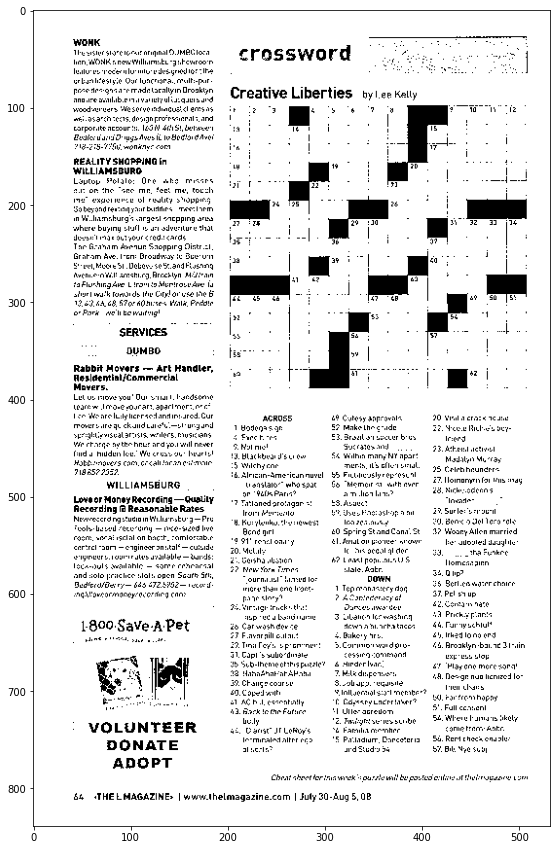

In [20]:
ret, th1 =cv2.threshold(img, 127, 255,cv2.THRESH_BINARY)
show_pic(th1)

# Adaptive Threshold
* https://stackoverflow.com/questions/28763419/adaptive-threshold-parameters-confusion
* https://docs.opencv.org/3.4.12/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576ac7e89a5e95490116e7d2082b3096b2b8

    @param src Source 8-bit single-channel image.
.   @param dst Destination image of the same size and the same type as src.
.   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
.   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
.   The #BORDER_REPLICATE | #BORDER_ISOLATED is used to process boundaries.
.   @param thresholdType Thresholding type that must be either #THRESH_BINARY or #THRESH_BINARY_INV,
.   see #ThresholdTypes.
.   @param blockSize Size of a pixel neighborhood that is used to calculate a threshold value for the
.   pixel: 3, 5, 7, and so on.
.   @param C Constant subtracted from the mean or weighted mean (see the details below). Normally, it
.   is positive but may be zero or negative as well.

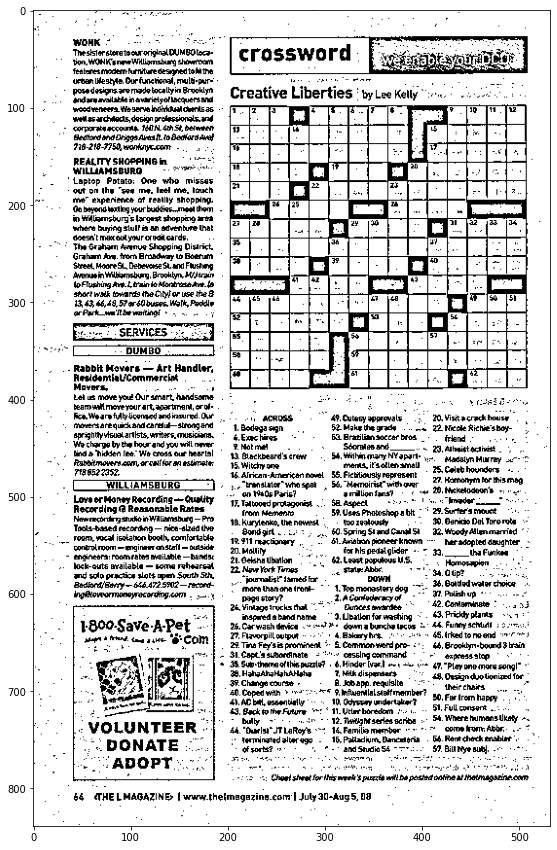

In [21]:
th2 =cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,8)
show_pic(th2)

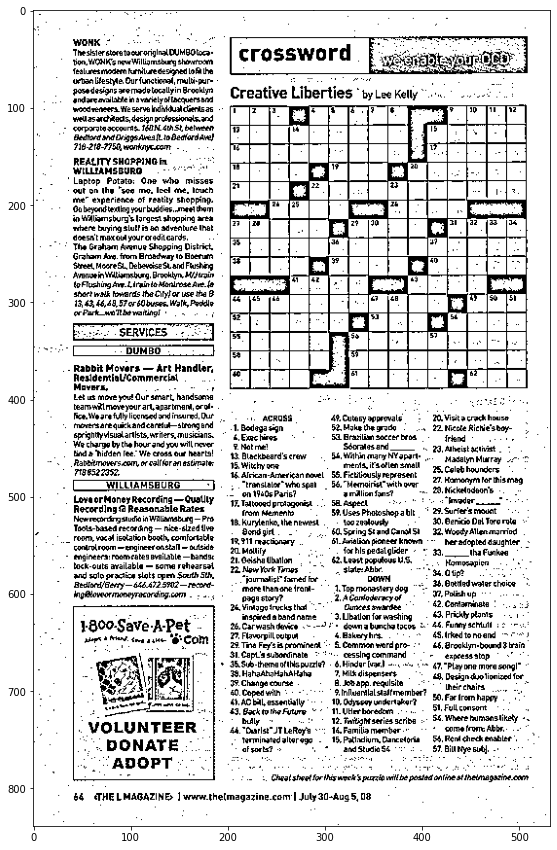

In [22]:
th3 =cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15,8)
show_pic(th3)

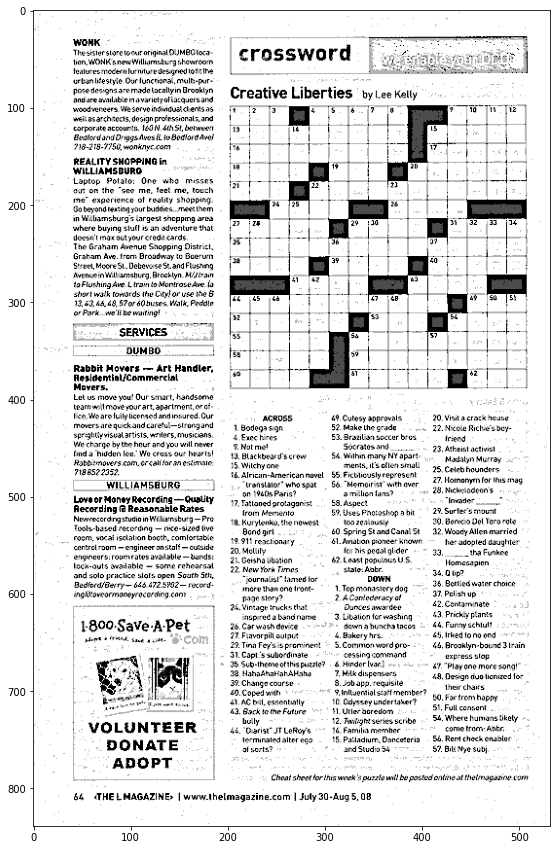

In [23]:
blended = cv2.addWeighted(src1=th1, alpha=0.7,src2=th2,beta=0.3, gamma=0)
show_pic(blended)